<a href="https://colab.research.google.com/github/uirom/practice/blob/main/(ORANGE)_python_book_part03_p190_(independent_sample_t_test).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 연산처리를 위한 패키지
import numpy as np
import pandas as pd
import scipy as sp
from scipy.stats import norm
from scipy import stats
from scipy.stats import bartlett

In [ ]:
# 시각화를 위한 패키지
from matplotlib import pyplot as plt
import seaborn as sns
# 그래프를 실제로 그리기 위한 설정
%matplotlib inline

# 경고 메세지를 무시합니다
import warnings
warnings.filterwarnings('ignore')

# 감자칩 데이터입니다
potato_chip = np.array([89.03, 95.07, 88.26, 90.07, 90.6, 87, 87.67, 88.8, 90.46, 81.33])

# 단일 표본 t-test 실시합니다
# scipy의 ttest_lsamp 사용. potato_chip: 감자칩 데이터, 90: 귀무가설의 기대값 중량 90g에 해당한다.
one_sample = stats.ttest_1samp(potato_chip, 90)

print('Statistic(t-value) : %.3f p-value : %.4f,' %one_sample)

Statistic(t-value) : -1.071 p-value : 0.3120,


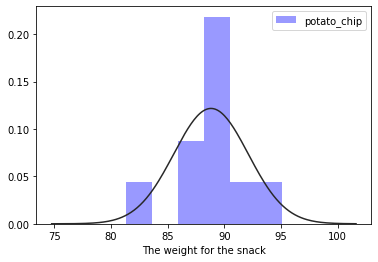

In [ ]:
# p-value와 유의 확률 값의 결과 귀무가설을 기각할 수 없다.
# 0.05<0.3120으로 유의수준(P-value)이 크기 때문

# kde(kerner Density Estimation): 구해진 히스토그램을 정규화한 뒤 확률 밀도 함수로 사용한다.

ax = sns.distplot(potato_chip, kde=False, fit =stats.norm, label="potato_chip", color='blue')
ax.set(xlabel = "The weight for the snack")
plt.legend()
plt.show()

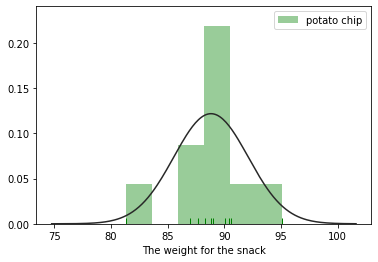

In [ ]:
# rug = True 값을 주면 빗금으로 해당 데이터의 위치가 표시된다

ax = sns.distplot(potato_chip, kde=False, fit=stats.norm, label="potato chip", color='green', rug=True)
ax.set(xlabel = "The weight for the snack")
plt.legend()
plt.show()

In [ ]:
# 독립표본 t - 검정 (independent sample t-test)

from google.colab import drive
drive.mount ('/gdrive/')

Mounted at /gdrive/


In [ ]:
df_independent_ttest = pd.read_csv('/gdrive/MyDrive/python data/promotion.csv',encoding='euc-kr')
df_independent_ttest.head()

,Store,promotion,profit
0,1,NO,2100
1,2,YES,3000
2,3,YES,2200
3,4,YES,2600
4,5,NO,1700


In [ ]:
# 프로모션을 진행했을 경우와 그렇지 않은 경우의 평균값을 포함한 데이터는 다음과 같다
df_independent_ttest[df_independent_ttest['promotion']=='NO'][['profit']].describe()

,profit
count,52.000000
mean,1923.076923
std,347.887397
min,1400.000000
25%,1675.000000
50%,1900.000000
75%,2125.000000
max,2800.000000


In [ ]:
df_independent_ttest[df_independent_ttest['promotion']=='YES'][['profit']].describe()

,profit
count,48.000000
mean,2906.250000
std,331.602332
min,2200.000000
25%,2600.000000
50%,2900.000000
75%,3125.000000
max,3600.000000


In [ ]:
# 프로모션 실시, 미실시 profit 데이터를 추출
arr_yes = df_independent_ttest[df_independent_ttest['promotion']=='YES']['profit']
arr_no = df_independent_ttest[df_independent_ttest['promotion']=='NO']['profit']

# 등분산 검정 레빈(Levene)입니다
levene = stats.levene(arr_yes, arr_no)
print('levene Result(F) : %.3f \np-value : %.3f'% (levene))

# 등분산 검정 플리그너(Fligner)입니다
fligner = stats.fligner(arr_yes, arr_no)
print('fligner Result(F) : %.3f \np-value : %.3f'% (fligner))

# 등분산 검정 바틀렛(Bartlett) 입니다
bartlett = stats.bartlett(arr_yes, arr_no)
print('bartlett Result(F) : %.3f \np-value : %.3f'% (bartlett))

# 독립표본 t검정, equal_var=True 분산차이는 없다
ind_ttest_result = stats.ttest_ind(arr_no, arr_yes, equal_var = True)
print('Statistic(t-value) : %.3f p_value : %.28f' %ind_ttest_result)


# 결과: p-value가 0.5보다 크므로 등분산성 조건 만족. p-value가 0.05보다 작기 때문에 유의미하다 보여짐

levene Result(F) : 0.258 
p-value : 0.612
fligner Result(F) : 0.179 
p-value : 0.672
bartlett Result(F) : 0.111 
p-value : 0.739
Statistic(t-value) : -14.439 p_value : 0.0000000000000000000000000527


In [ ]:
# 대응표본 t 검정 (paired sample t-test)

df_paired_ttest = pd.read_csv('/gdrive/MyDrive/python data/tvads.csv')
df_paired_ttest.head()


# 결과확인: before는 광고를 하기 전, after는 광고를 하고 난 후의 값

,store,before,after
0,1,290,326
1,2,304,306
2,3,282,328
3,4,293,322
4,5,288,314


In [ ]:
before = np.array(df_paired_ttest['before'])
after = np.array(df_paired_ttest['after'])

# 대응 표본 t-검정
paired_ttest_result = stats.ttest_rel(after,before)
print('Statistic(t-value): %.3f p-value: %.28f' %paired_ttest_result)

# 결과확인: p-value가 0.05보다 작기때문에 광고전보다 유의미한 결과있음 확인가능

Statistic(t-value): 13.532 p-value: 0.0000000000000000005472565823


In [ ]:
# 평균
diff_result = after - before
diff_result.mean()

# 결과확인: 광고 이후 평균적으로 33.29의 매출증가가 있었음을 확인

33.29090909090909

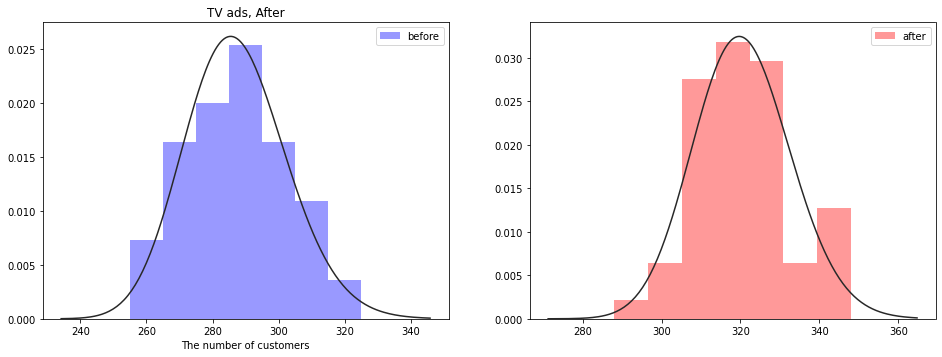

In [ ]:
plt.figure(figsize=(16,12))

ax1 = plt.subplot(221)
ax1 = sns.distplot(before, kde=False, fit=stats.gamma, label="before", color='blue')
ax1.set(xlabel = "The number of customers", title="TV ads, Before")
plt.legend()

ax2 = plt.subplot(222)
ax2 = sns.distplot(after, kde=False, fit=stats.gamma, label="after", color='red')
ax1.set(xlabel = "The number of customers", title="TV ads, After")

plt.legend()
plt.show()

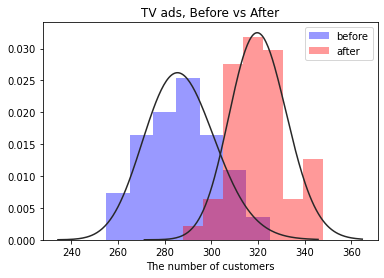

In [ ]:
ax3 = plt.subplots()
ax3 = sns.distplot(before, kde=False, fit=stats.gamma, label="before", color='blue')
ax3 = sns.distplot(after, kde=False, fit=stats.gamma, label="after", color='red')
ax3.set(xlabel = "The number of customers", title = "TV ads, Before vs After")

plt.legend()
plt.show()